In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import tree
import re

In [2]:
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()
target= data['target']
target_names = data['target_names']
mapper = dict( (i,target_names[i]) for i in range(3))
#mapp values in target to named classes
target_series = pd.Series([(lambda x:mapper[x])(i) for i in target])
df['species'] = target_series
df.head()
# matching of data and target cols 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
train, test = train_test_split(df,test_size=0.20)# 20% test
print(len(test))
len(train)

30


120

## Q3 a,b,c

In [4]:
def entropy(samples):
    if len(samples) < 2:
        return 0
    
    freq = np.array(samples.value_counts(normalize=True))
    return -(freq * np.log2(freq + 1e-6)).sum()

def information_gain (samples,target, attribute):
    values = samples[attribute].value_counts(normalize=True)
    split_entropy = 0
    for v,fr in values.iteritems():
        sub_ent = entropy(samples[samples[attribute] == v][target])
        split_entropy += fr * sub_ent
    ent = entropy(samples[target])

    return ent - split_entropy

def averaged_array(array):
    return array


In [5]:
class tree_node:

    def __init__(self,samples,target):
        self.decsion = None
        self.samples = samples
        self.target = target
        self.split_attribute = None
        self.children = None
        self.parent = None

    def make(self):
        target = self.target
        samples = self.samples
        #if no samples, something has gone very wrong
        if len(samples)  == 0:
            print("?")
            self.decsion = "Zero sam"
        #if samples are of one kind, make decsion to be of teh sample kind
        elif (len(samples[target].unique()) == 1):
            self.decsion = samples[target].unique()[0]
            print(self.decsion)
            return
        #if samples are mixed, then...
        else:

            best_info_gain = 0
            revised_samples = pd.DataFrame()

            #create a data frame that comapres teh values of each column of irsi in boolean form
            # this is teh part that makes things slow
            for attribute in samples.keys():
                if attribute == target:
                    continue  
                #find all unqiue values of teh attribute
                unique_values = samples[attribute].sort_values().unique()
                #avagere array
                unique_values = averaged_array(unique_values)
                for divider in unique_values:
                #check if value is greater than divider value and make nwew columnregarding this
                    name = attribute +" > " + str(divider)
                    revised_samples[name] = samples[attribute] >  divider

            revised_samples[target] = samples[target]

            # then from this revised df just pick out columns with bets information gain
            for attribute in revised_samples.keys():
                if attribute == target:
                    continue               
                
                info_gain = information_gain(revised_samples,target,attribute)
                #print("Information Gain at {}: {:.2f}".format(attribute,info_gain))
                if info_gain > best_info_gain:
                    best_info_gain = info_gain
                    self.split_attribute = attribute
            #print("Spliting by: {} Info Gain: {:.2f}".format(self.split_attribute,best_info_gain))

            self.children = {}
            #then set value and make the child nodes
            for value in revised_samples[self.split_attribute].unique():
                index = revised_samples[self.split_attribute] == value
                
                print((self.split_attribute,value))
                self.children[value] = tree_node(samples[index],target)
                self.children[value].make()
            
    #basic print desion logic to get to a result
    def print(self,prefix=''):
        if self.split_attribute is not None:
            for k,v in self.children.items():
                v.print("{} If {} is ({}) and".format(prefix,self.split_attribute, k))
        else:
            final = re.sub("and$","",prefix)
            print("{}, Then flower is: {}".format(final,self.decsion))


    def predict(self,sample):
        if self.decsion is not None:
            return self.decsion
        else:
            #split spit_attirbute to actual cloumn name and value
            split_attribute = self.split_attribute
            column,value = re.split(" > ",split_attribute)

            value = float(value)
            
            #check value comap[rd to split value , then set child to crrect one
            child = self.children[float(sample[column]) > value]
            return child.predict(sample)


class ID3_tree:
    def __init__(self):
        self.root = None
    def fit (self,samples,target):
        self.root = tree_node(samples, target)
        self.root.make()


t = ID3_tree()
t.fit(train,'species')


('petal length (cm) > 1.9', True)
('petal length (cm) > 4.7', False)
('sepal length (cm) > 4.9', True)
versicolor
('sepal length (cm) > 4.9', False)
virginica
('petal length (cm) > 4.7', True)
('petal length (cm) > 5.1', True)
virginica
('petal length (cm) > 5.1', False)
('petal width (cm) > 1.6', True)
('sepal width (cm) > 3.1', False)
virginica
('sepal width (cm) > 3.1', True)
versicolor
('petal width (cm) > 1.6', False)
('sepal length (cm) > 6.3', True)
versicolor
('sepal length (cm) > 6.3', False)
('petal width (cm) > 1.5', True)
versicolor
('petal width (cm) > 1.5', False)
virginica
('petal length (cm) > 1.9', False)
setosa


## tree formed

In [6]:
t.root.print()

 If petal length (cm) > 1.9 is (True) and If petal length (cm) > 4.7 is (False) and If sepal length (cm) > 4.9 is (True) , Then flower is: versicolor
 If petal length (cm) > 1.9 is (True) and If petal length (cm) > 4.7 is (False) and If sepal length (cm) > 4.9 is (False) , Then flower is: virginica
 If petal length (cm) > 1.9 is (True) and If petal length (cm) > 4.7 is (True) and If petal length (cm) > 5.1 is (True) , Then flower is: virginica
 If petal length (cm) > 1.9 is (True) and If petal length (cm) > 4.7 is (True) and If petal length (cm) > 5.1 is (False) and If petal width (cm) > 1.6 is (True) and If sepal width (cm) > 3.1 is (False) , Then flower is: virginica
 If petal length (cm) > 1.9 is (True) and If petal length (cm) > 4.7 is (True) and If petal length (cm) > 5.1 is (False) and If petal width (cm) > 1.6 is (True) and If sepal width (cm) > 3.1 is (True) , Then flower is: versicolor
 If petal length (cm) > 1.9 is (True) and If petal length (cm) > 4.7 is (True) and If petal 

## Test value and accuracy for ID3 scracth algo

In [7]:
correct=0
for i,row in test.iterrows():
    pred = t.root.predict(row)
    actual = row['species']
    if actual == pred:
        correct += 1
        print(row[0:4])
        print("Predicted: " + pred + " | Actual: " + actual)
correct/len(test)*100

sepal length (cm)    7.7
sepal width (cm)     2.6
petal length (cm)    6.9
petal width (cm)     2.3
Name: 118, dtype: object
Predicted: virginica | Actual: virginica
sepal length (cm)    7.7
sepal width (cm)     3.8
petal length (cm)    6.7
petal width (cm)     2.2
Name: 117, dtype: object
Predicted: virginica | Actual: virginica
sepal length (cm)    6.7
sepal width (cm)     3.1
petal length (cm)    5.6
petal width (cm)     2.4
Name: 140, dtype: object
Predicted: virginica | Actual: virginica
sepal length (cm)    6.7
sepal width (cm)     3.1
petal length (cm)    4.7
petal width (cm)     1.5
Name: 86, dtype: object
Predicted: versicolor | Actual: versicolor
sepal length (cm)    6.1
sepal width (cm)       3
petal length (cm)    4.6
petal width (cm)     1.4
Name: 91, dtype: object
Predicted: versicolor | Actual: versicolor
sepal length (cm)    6.9
sepal width (cm)     3.1
petal length (cm)    5.4
petal width (cm)     2.1
Name: 139, dtype: object
Predicted: virginica | Actual: virginica
se

86.66666666666667

In [8]:
t.root.print('\n')


 If petal length (cm) > 1.9 is (True) and If petal length (cm) > 4.7 is (False) and If sepal length (cm) > 4.9 is (True) , Then flower is: versicolor

 If petal length (cm) > 1.9 is (True) and If petal length (cm) > 4.7 is (False) and If sepal length (cm) > 4.9 is (False) , Then flower is: virginica

 If petal length (cm) > 1.9 is (True) and If petal length (cm) > 4.7 is (True) and If petal length (cm) > 5.1 is (True) , Then flower is: virginica

 If petal length (cm) > 1.9 is (True) and If petal length (cm) > 4.7 is (True) and If petal length (cm) > 5.1 is (False) and If petal width (cm) > 1.6 is (True) and If sepal width (cm) > 3.1 is (False) , Then flower is: virginica

 If petal length (cm) > 1.9 is (True) and If petal length (cm) > 4.7 is (True) and If petal length (cm) > 5.1 is (False) and If petal width (cm) > 1.6 is (True) and If sepal width (cm) > 3.1 is (True) , Then flower is: versicolor

 If petal length (cm) > 1.9 is (True) and If petal length (cm) > 4.7 is (True) and If 

# ID3 by sciket learn

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris

In [10]:
iris = load_iris()

In [11]:
X= train.iloc[:,0:3] 
y=train.iloc[:,4]

In [12]:
model = DecisionTreeClassifier(criterion='entropy').fit(X, y)

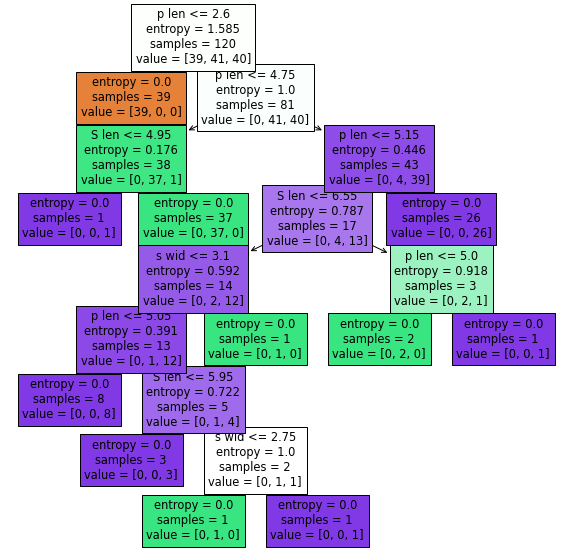

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plot_tree(model,filled=True,feature_names=['S len','s wid','p len','p wid'])
plt.show()

In [14]:
p=model.predict(test.iloc[:,0:3])
p

array(['virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'setosa', 'virginica', 'virginica', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa'], dtype=object)

In [15]:
model.score(test.iloc[:,0:3],test.iloc[:,-1])*100

90.0

## We observe that Sciket module has 93.33 % accuracy on test data, if we compare with ID3 scratch accuracy value it is 96.67% . ~3.3 %
